# Final project random forest

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

## Will wrangle data into x variables and y variable with y variable being the variable we will be predicting and x being everything used to predict it

In [2]:
Diabetes = pd.read_csv("Diabetes5050.csv")

In [3]:
X = Diabetes.drop('Diabetes_binary', axis=1)
y = Diabetes['Diabetes_binary']

Now we must create our train test split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

Now I made just a single decision tree just to check for a comparison

In [5]:
decisiontree = DecisionTreeClassifier()
decisiontree.fit(X_train, y_train)

DecisionTreeClassifier()

assess the model 

In [6]:
treePredictions = decisiontree.predict(X_test)
print(confusion_matrix(y_test, treePredictions))
print(classification_report(y_test, treePredictions))

[[5832 2998]
 [3079 5764]]
              precision    recall  f1-score   support

         0.0       0.65      0.66      0.66      8830
         1.0       0.66      0.65      0.65      8843

    accuracy                           0.66     17673
   macro avg       0.66      0.66      0.66     17673
weighted avg       0.66      0.66      0.66     17673



having diabetes as well as not having diabetes was predicted with 66% precision

## Random forest for all variables

In [7]:
Dforest = RandomForestClassifier(n_estimators=500, random_state=42)
Dforest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=42)

In [8]:
ForestPredictions = Dforest.predict(X_test)
print(confusion_matrix(y_test, ForestPredictions))
print(classification_report(y_test, ForestPredictions))

[[6172 2658]
 [1914 6929]]
              precision    recall  f1-score   support

         0.0       0.76      0.70      0.73      8830
         1.0       0.72      0.78      0.75      8843

    accuracy                           0.74     17673
   macro avg       0.74      0.74      0.74     17673
weighted avg       0.74      0.74      0.74     17673



In [9]:
Dforest.score(X_test, y_test)

0.7413002885757936

This shows that our random forest has a weighted accuracy of 74%

Now we will try and fine tune this with the four hyperparameters

First we will find the best amount of estimators to use for the most accuracy

Create a for loop to test each number.

In [10]:
n_estimators_array = [10, 20, 50, 75, 100, 250, 500, 750]
results = []
for n in n_estimators_array:
    forest = RandomForestClassifier(n_estimators=n)
    forest.fit(X_train, y_train)
    result = accuracy_score(y_test, forest.predict(X_test))
    results.append(result)
    print(n, ':', result)


10 : 0.7128953771289538
20 : 0.7271544163413116
50 : 0.7368867764386352
75 : 0.7371696938833249
100 : 0.7376223617948283
250 : 0.7396027839076558
500 : 0.7399988683302212
750 : 0.7401120353080971


This shows that 500 will have the most accuracy

Now for the other three tunings we will do them together.

In [11]:
param_distributions = {
    'n_estimators': [100, 200, 300, 500],
    'max_features': [0.5, 'sqrt', 'log2', None],  
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the RandomForestClassifier
rf = RandomForestClassifier()

# Set up the RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=param_distributions, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Fit the model
rf_random.fit(X_train, y_train)

# Get the best parameters found by the search
best_params = rf_random.best_params_
print("Best parameters found: ", best_params)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=False, max_depth=20, max_features=0.5, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=  16.3s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   3.8s
[CV] END bootstrap=True, max_depth=None, max_features=None, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=  22.1s
[CV] END bootstrap=False, max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   3.4s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   3.0s
[CV] END bootstrap=False, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   3.8s
[CV] END bootstrap=True, max_depth=None, max_features=0.5, min_samples_leaf=2, min_samples_split=2, n_estimators=

/opt/anaconda3/envs/dev/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END bootstrap=False, max_depth=10, max_features=0.5, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   3.6s
[CV] END bootstrap=True, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   2.0s
[CV] END bootstrap=True, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   2.0s
[CV] END bootstrap=False, max_depth=10, max_features=None, min_samples_leaf=4, min_samples_split=5, n_estimators=500; total time=  34.5s
[CV] END bootstrap=False, max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   3.3s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   2.9s
[CV] END bootstrap=False, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   3.8s
[CV] END bootstrap=False, max_depth=10, ma

In [12]:
best_rf_model = rf_random.best_estimator_

# Make predictions using the best model
best_rf_predictions = best_rf_model.predict(X_test)

# Evaluate the accuracy of the best model
best_accuracy = accuracy_score(y_test, best_rf_predictions)
print("Best model accuracy: ", best_accuracy)

Best model accuracy:  0.7499009788943586


In [13]:
param_grid = {
    'max_features': [best_params['max_features']],
    'max_depth': [max(1, best_params['max_depth'] - 10), best_params['max_depth'], best_params['max_depth'] + 10],
    'min_samples_leaf': [
        max(1, best_params['min_samples_leaf'] - 1), 
        best_params['min_samples_leaf'], 
        best_params['min_samples_leaf'] + 1
    ]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3)
grid_search.fit(X_train, y_train)

print("Best parameters after grid search: ", grid_search.best_params_)

[CV] END bootstrap=False, max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=  18.4s
[CV] END bootstrap=True, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   3.3s
[CV] END bootstrap=False, max_depth=None, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=  54.3s
[CV] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=500; total time=  11.5s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=  10.0s
[CV] END bootstrap=False, max_depth=30, max_features=0.5, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   6.0s
[CV] END bootstrap=True, max_depth=30, max_features=None, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=  14.5s
[CV] END bootstrap=False, max_depth=30, 

In [14]:
Dforest = RandomForestClassifier(
    n_estimators=500,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='log2',
    max_depth=10,
    bootstrap=False
)

Dforest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, max_depth=10, max_features='log2',
                       min_samples_leaf=2, min_samples_split=5,
                       n_estimators=500)

In [15]:
Dforest.score(X_test, y_test)

0.7502404798279861

### we can predict diabetes with all variables with almost 75 % accuracy 

In [16]:
ForestPredictions = Dforest.predict(X_test)
print(confusion_matrix(y_test, ForestPredictions))
print(classification_report(y_test, ForestPredictions))

[[6226 2604]
 [1810 7033]]
              precision    recall  f1-score   support

         0.0       0.77      0.71      0.74      8830
         1.0       0.73      0.80      0.76      8843

    accuracy                           0.75     17673
   macro avg       0.75      0.75      0.75     17673
weighted avg       0.75      0.75      0.75     17673



## try to get an even better accuracy with top 11 features

In [17]:
feature_importances = pd.Series(Dforest.feature_importances_, index=X.columns)
print(feature_importances)

HighBP                  0.213653
HighChol                0.100672
CholCheck               0.008825
BMI                     0.135607
Smoker                  0.003385
Stroke                  0.004780
HeartDiseaseorAttack    0.036077
PhysActivity            0.007047
Fruits                  0.002683
Veggies                 0.002787
HvyAlcoholConsump       0.008775
AnyHealthcare           0.001851
NoDocbcCost             0.002104
GenHlth                 0.232191
MentHlth                0.008430
PhysHlth                0.024883
DiffWalk                0.058197
Sex                     0.006849
Age                     0.100147
Education               0.012057
Income                  0.029001
dtype: float64


In [18]:
feature_importances.sort_values(inplace=True, ascending=False)
print(feature_importances)

GenHlth                 0.232191
HighBP                  0.213653
BMI                     0.135607
HighChol                0.100672
Age                     0.100147
DiffWalk                0.058197
HeartDiseaseorAttack    0.036077
Income                  0.029001
PhysHlth                0.024883
Education               0.012057
CholCheck               0.008825
HvyAlcoholConsump       0.008775
MentHlth                0.008430
PhysActivity            0.007047
Sex                     0.006849
Stroke                  0.004780
Smoker                  0.003385
Veggies                 0.002787
Fruits                  0.002683
NoDocbcCost             0.002104
AnyHealthcare           0.001851
dtype: float64


Graph for that just for visualization

<Axes: >

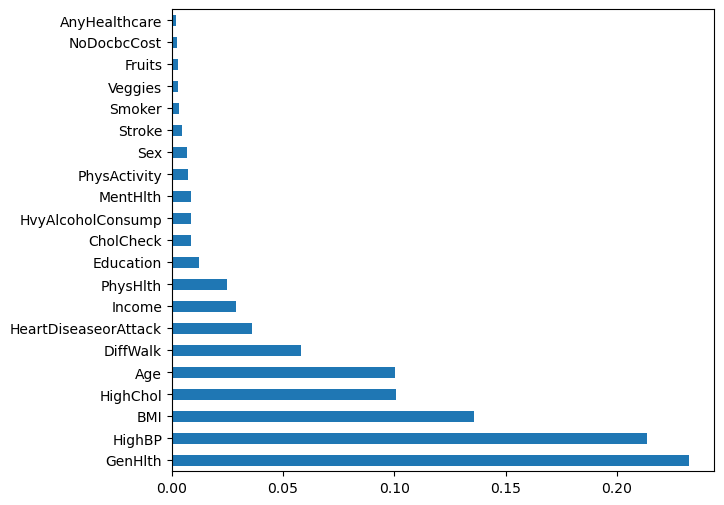

In [19]:
feature_importances.plot(kind='barh', figsize=(7,6))

In [20]:
X = Diabetes[['BMI', 'Age', 'GenHlth', 'Income', 'HighBP', 'PhysHlth', 'Education', 'MentHlth', 'HighChol', 'Fruits', 'Smoker']]
y = Diabetes['Diabetes_binary']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

In [22]:
# Hyperparameter grid for RandomizedSearchCV
param_distributions = {
    'n_estimators': [100, 200, 300, 500],
    'max_features': [0.5, 'sqrt', 'log2', None],  
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Set up the RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator=rf, 
                               param_distributions=param_distributions, 
                               n_iter=100, 
                               cv=3, 
                               verbose=2, 
                               random_state=42, 
                               n_jobs=-1)

# Fit the model
rf_random.fit(X_train, y_train)

# Get the best parameters found by the search
best_params = rf_random.best_params_
print("Best parameters found: ", best_params)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=True, max_depth=20, max_features=0.5, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   8.1s
[CV] END bootstrap=True, max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=  21.7s


/opt/anaconda3/envs/dev/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END bootstrap=True, max_depth=20, max_features=0.5, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   8.2s
[CV] END bootstrap=True, max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=  21.8s
[CV] END bootstrap=False, max_depth=20, max_features=0.5, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=  25.9s
[CV] END bootstrap=True, max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=16.5min
[CV] END bootstrap=False, max_depth=10, max_features=0.5, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   2.7s
[CV] END bootstrap=False, max_depth=10, max_features=0.5, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   2.7s
[CV] END bootstrap=True, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   2.0s
[CV] END bootstrap=False, max_depth=10, max_fe

In [23]:
best_rf_model = rf_random.best_estimator_

# Make predictions using the best model
best_rf_predictions = best_rf_model.predict(X_test)

# Evaluate the accuracy of the best model
best_accuracy = accuracy_score(y_test, best_rf_predictions)
print("Best model accuracy: ", best_accuracy)

Best model accuracy:  0.7455440502461381


In [24]:
param_grid = {
    'max_features': [best_params['max_features']],
    'max_depth': [max(1, best_params['max_depth'] - 10), best_params['max_depth'], best_params['max_depth'] + 10],
    'min_samples_leaf': [
        max(1, best_params['min_samples_leaf'] - 1), 
        best_params['min_samples_leaf'], 
        best_params['min_samples_leaf'] + 1
    ]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3)
grid_search.fit(X_train, y_train)

print("Best parameters after grid search: ", grid_search.best_params_)

Best parameters after grid search:  {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 5}


In [25]:
Dforest1 = RandomForestClassifier(
    n_estimators=300,  # From RandomizedSearchCV
    min_samples_split=10,  # From RandomizedSearchCV
    min_samples_leaf=5,  # Fine-tuned from GridSearchCV
    max_features='sqrt',  # From RandomizedSearchCV and confirmed by GridSearchCV
    max_depth=10,  # From RandomizedSearchCV and confirmed by GridSearchCV
    bootstrap=True,  # From RandomizedSearchCV
    random_state=42,
    verbose=0  # Suppress the output
)

Dforest1.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=10,
                       n_estimators=300, random_state=42)

In [26]:
Dforest1.score(X_test, y_test)

0.7454874667572002

In [27]:
ForestPredictions1 = Dforest1.predict(X_test)
print(confusion_matrix(y_test, ForestPredictions1))
print(classification_report(y_test, ForestPredictions1))

[[6189 2641]
 [1857 6986]]
              precision    recall  f1-score   support

         0.0       0.77      0.70      0.73      8830
         1.0       0.73      0.79      0.76      8843

    accuracy                           0.75     17673
   macro avg       0.75      0.75      0.74     17673
weighted avg       0.75      0.75      0.74     17673



## top 5 feature classifier

In [28]:
X = Diabetes[['BMI', 'Age', 'GenHlth', 'Income', 'HighBP']]
y = Diabetes['Diabetes_binary']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [30]:
# Hyperparameter grid for RandomizedSearchCV
param_distributions = {
    'n_estimators': [100, 200, 300, 500],
    'max_features': [0.5, 'sqrt', 'log2', None],  
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Set up the RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator=rf, 
                               param_distributions=param_distributions, 
                               n_iter=100, 
                               cv=3, 
                               verbose=2, 
                               random_state=42, 
                               n_jobs=-1)

# Fit the model
rf_random.fit(X_train, y_train)

# Get the best parameters found by the search
best_params = rf_random.best_params_
print("Best parameters found: ", best_params)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=False, max_depth=10, max_features=0.5, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   1.3s
[CV] END bootstrap=True, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   1.5s
[CV] END bootstrap=True, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   1.4s
[CV] END bootstrap=True, max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   5.1s


/opt/anaconda3/envs/dev/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END bootstrap=True, max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=500; total time=  10.6s
[CV] END bootstrap=True, max_depth=20, max_features=0.5, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   4.4s
[CV] END bootstrap=False, max_depth=10, max_features=None, min_samples_leaf=4, min_samples_split=5, n_estimators=500; total time=  12.9s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   1.7s
[CV] END bootstrap=False, max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   2.1s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   2.0s
[CV] END bootstrap=True, max_depth=20, max_features=None, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   5.2s
[CV] END bootstrap=True, max_depth=30, max_fe

In [31]:
best_rf_model = rf_random.best_estimator_

# Make predictions using the best model
best_rf_predictions = best_rf_model.predict(X_test)

# Evaluate the accuracy of the best model
best_accuracy = accuracy_score(y_test, best_rf_predictions)
print("Best model accuracy: ", best_accuracy)

Best model accuracy:  0.7431158053564693


In [32]:
param_grid = {
    'max_features': [best_params['max_features']],
    'max_depth': [max(1, best_params['max_depth'] - 10), best_params['max_depth'], best_params['max_depth'] + 10],
    'min_samples_leaf': [
        max(1, best_params['min_samples_leaf'] - 1), 
        best_params['min_samples_leaf'], 
        best_params['min_samples_leaf'] + 1
    ]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3)
grid_search.fit(X_train, y_train)

print("Best parameters after grid search: ", grid_search.best_params_)

Best parameters after grid search:  {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2}


In [33]:
Dforest2 = RandomForestClassifier(n_estimators=300,
                                  min_samples_split=10,
                                  min_samples_leaf=5,
                                  max_features='sqrt',
                                  max_depth=10,
                                  bootstrap=True,
                                  random_state=42,
                                  verbose=0
                                  )
Dforest2.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=10,
                       n_estimators=300, random_state=42)

In [34]:
Dforest2.score(X_test, y_test)

0.7437287815918522

In [35]:
ForestPredictions2 = Dforest2.predict(X_test)
print(confusion_matrix(y_test, ForestPredictions2))
print(classification_report(y_test, ForestPredictions2))

[[7494 3107]
 [2328 8279]]
              precision    recall  f1-score   support

         0.0       0.76      0.71      0.73     10601
         1.0       0.73      0.78      0.75     10607

    accuracy                           0.74     21208
   macro avg       0.75      0.74      0.74     21208
weighted avg       0.75      0.74      0.74     21208



## features I wanted to see if I could predict diabetes

In [36]:
X = Diabetes[['MentHlth', 'Fruits', 'Veggies', 'PhysActivity']]
y = Diabetes['Diabetes_binary']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=4)

In [38]:
# Hyperparameter grid for RandomizedSearchCV
param_distributions = {
    'n_estimators': [100, 200, 300, 500],
    'max_features': [0.5, 'sqrt', 'log2', None],  
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Set up the RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator=rf, 
                               param_distributions=param_distributions, 
                               n_iter=100, 
                               cv=3, 
                               verbose=2, 
                               random_state=42, 
                               n_jobs=-1)

# Fit the model
rf_random.fit(X_train, y_train)

# Get the best parameters found by the search
best_params = rf_random.best_params_
print("Best parameters found: ", best_params)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best parameters found:  {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': None, 'bootstrap': True}


In [39]:
best_rf_model = rf_random.best_estimator_

# Make predictions using the best model
best_rf_predictions = best_rf_model.predict(X_test)

# Evaluate the accuracy of the best model
best_accuracy = accuracy_score(y_test, best_rf_predictions)
print("Best model accuracy: ", best_accuracy)

Best model accuracy:  0.5809128630705395


In [40]:
param_grid = {
    'max_features': [best_params['max_features']],
    'max_depth': [
        max(1, (best_params['max_depth'] - 10) if best_params['max_depth'] is not None else 10), 
        best_params['max_depth'] if best_params['max_depth'] is not None else 20, 
        (best_params['max_depth'] + 10) if best_params['max_depth'] is not None else 30
    ],
    'min_samples_leaf': [
        max(1, best_params['min_samples_leaf'] - 1), 
        best_params['min_samples_leaf'], 
        best_params['min_samples_leaf'] + 1
    ]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3)
grid_search.fit(X_train, y_train)

print("Best parameters after grid search: ", grid_search.best_params_)

Best parameters after grid search:  {'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 2}


In [41]:
Dforest3 = RandomForestClassifier(n_estimators=300,
                                  min_samples_split=5,
                                  min_samples_leaf=2,
                                  max_features='log2',
                                  max_depth=20,
                                  bootstrap=True,
                                  random_state=4,
                                  verbose=0
                                 )
Dforest3.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, max_features='log2', min_samples_leaf=2,
                       min_samples_split=5, n_estimators=300, random_state=4)

In [42]:
Dforest3.score(X_test, y_test)

0.5807242549981139

In [44]:
ForestPredictions3 = Dforest3.predict(X_test)
print(confusion_matrix(y_test, ForestPredictions3))
print(classification_report(y_test, ForestPredictions3))

[[6771 3868]
 [5024 5545]]
              precision    recall  f1-score   support

         0.0       0.57      0.64      0.60     10639
         1.0       0.59      0.52      0.55     10569

    accuracy                           0.58     21208
   macro avg       0.58      0.58      0.58     21208
weighted avg       0.58      0.58      0.58     21208



## Conclusions

### In conclusion it is the best prediction accuracy with all variables. As well as there is not a substantial amount of evidance to suggest that we can succesfully predict diabetes based off of mental health. 